In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('weatherHistory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [18]:
df.shape

(96453, 11)

In [19]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [20]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [21]:
df['Formatted Date'].dtype

datetime64[ns, UTC]

In [22]:
df=df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [24]:
data_columns=['Temperature (C)','Humidity']
month_mean=df[data_columns].resample('MS').mean()
month_mean.head()

,Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,0.577778,0.890000
2006-01-01 00:00:00+00:00,-1.677942,0.834610
2006-02-01 00:00:00+00:00,-0.065394,0.843467
2006-03-01 00:00:00+00:00,4.559274,0.778737
2006-04-01 00:00:00+00:00,12.635031,0.728625


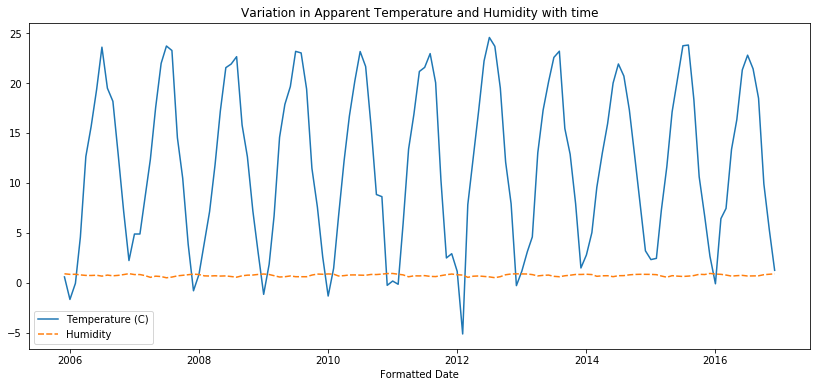

In [29]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=month_mean)

                           Temperature (C)  Humidity
Formatted Date                                      
2006-04-01 00:00:00+00:00        12.635031  0.728625
2007-04-01 00:00:00+00:00        12.348071  0.536361
2008-04-01 00:00:00+00:00        11.804622  0.693194
2009-04-01 00:00:00+00:00        14.559159  0.567847
2010-04-01 00:00:00+00:00        12.194329  0.706875
2011-04-01 00:00:00+00:00        13.378665  0.591625
2012-04-01 00:00:00+00:00        12.591088  0.650222
2013-04-01 00:00:00+00:00        13.014205  0.677667
2014-04-01 00:00:00+00:00        12.978812  0.691403
2015-04-01 00:00:00+00:00        11.612160  0.547764
2016-04-01 00:00:00+00:00        13.345062  0.659972


Temperature (C)    float64
Humidity           float64
dtype: object

### Following graphs showing the Monthwise apparent temperature from 2006 to 2016

Text(0.5, 0, 'Month of Januray')

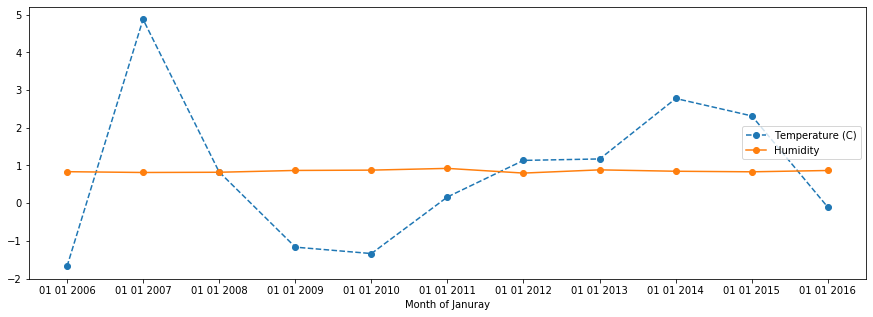

In [42]:
df1=month_mean[month_mean.index.month==1]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-01-01':'2016-01-01', 'Temperature (C)'], marker='o', linestyle='--',label='Temperature (C)')
ax.plot(df1.loc['2006-01-01':'2016-01-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['01-01-2006','01-01-2007','01-01-2008','01-01-2009','01-01-2010','01-01-2011','01-01-2012','01-01-2013','01-01-2014','01-01-2015','01-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of Januray')

### As we can see that Average Apparent Temperature in January is somewhere getting affected and is most affected in 2007 and the avg temp is also decreased by 1 degree from 2006 to 2016.

Text(0.5, 0, 'Month of February')

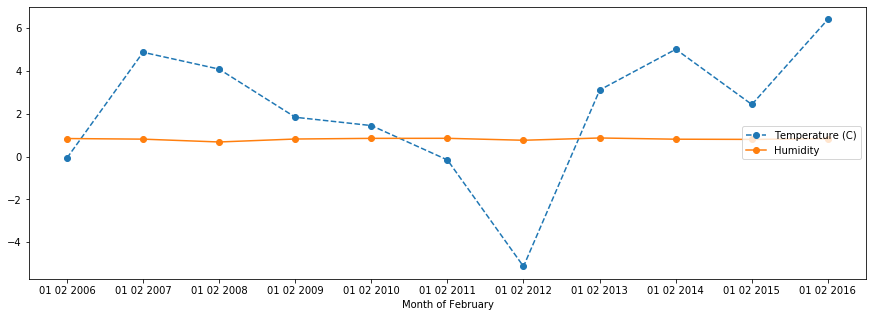

In [43]:
df1=month_mean[month_mean.index.month==2]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-02-01':'2016-02-01', 'Temperature (C)'], marker='o', linestyle='--',label='Temperature (C)')
ax.plot(df1.loc['2006-02-01':'2016-02-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['02-01-2006','02-01-2007','02-01-2008','02-01-2009','02-01-2010','02-01-2011','02-01-2012','02-01-2013','02-01-2014','02-01-2015','02-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of February')

### As we know that in the month of February temp remains somewhere low but we can see from the figure that the average temperature has risen too much from 2006 to 2016 except 2012.

Text(0.5, 0, 'Month of March')

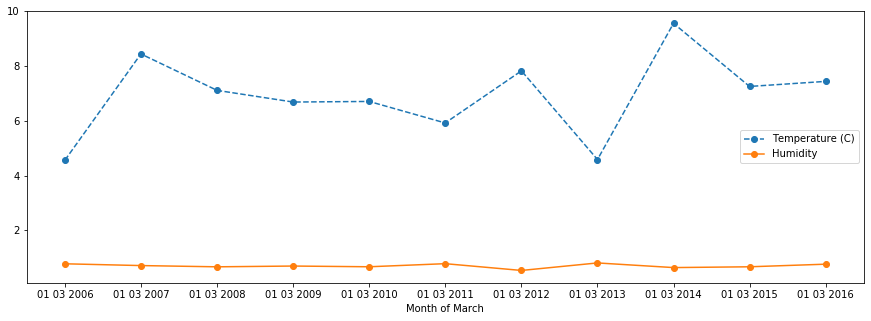

In [44]:
df1=month_mean[month_mean.index.month==3]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-03-01':'2016-03-01', 'Temperature (C)'], marker='o', linestyle='--',label='Temperature (C)')
ax.plot(df1.loc['2006-03-01':'2016-03-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['03-01-2006','03-01-2007','03-01-2008','03-01-2009','03-01-2010','03-01-2011','03-01-2012','03-01-2013','03-01-2014','03-01-2015','03-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of March')

### We can see from the figure that the average temperature has risen too much from 2006 to 2016 and thus is affected by the Global Warming.

Text(0.5, 0, 'Month of April')

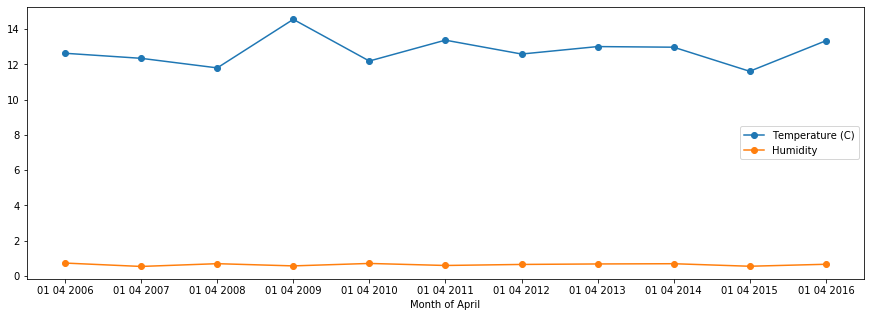

In [45]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==4]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-04-01':'2016-04-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['04-01-2006','04-01-2007','04-01-2008','04-01-2009','04-01-2010','04-01-2011','04-01-2012','04-01-2013','04-01-2014','04-01-2015','04-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of April')

### There is no changes in average humidity over the ten years from 2006 to 2016. Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 , then a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016.so, there is no major changes except 2009,2010,2011 and 2015.

Text(0.5, 0, 'Month of May')

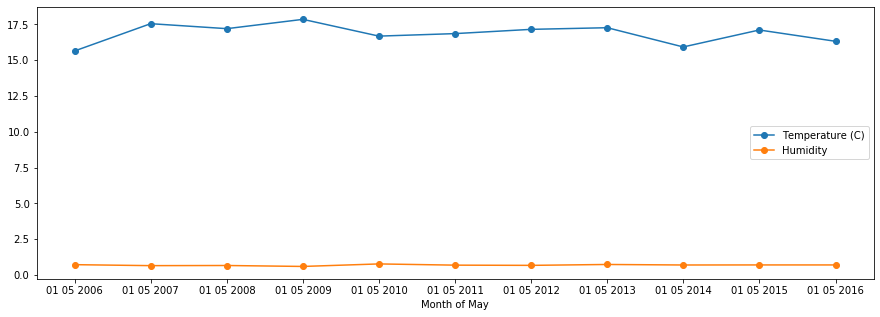

In [46]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==5]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-05-01':'2016-05-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-05-01':'2016-05-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['05-01-2006','05-01-2007','05-01-2008','05-01-2009','05-01-2010','05-01-2011','05-01-2012','05-01-2013','05-01-2014','05-01-2015','05-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of May')

### In this the Average temperature is somewhat constant throughout the years.

Text(0.5, 0, 'Month of June')

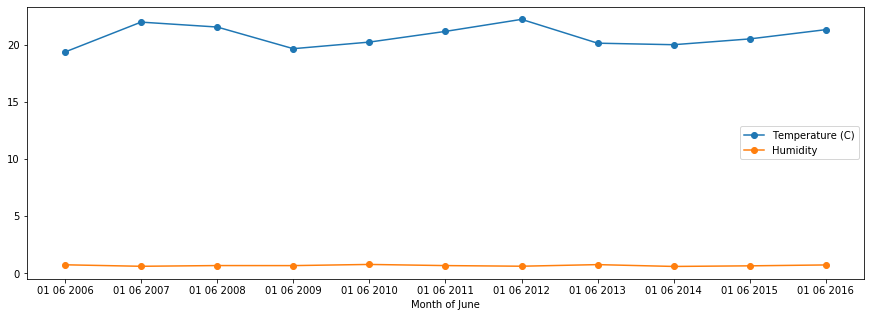

In [47]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==6]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-06-01':'2016-06-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-06-01':'2016-06-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['06-01-2006','06-01-2007','06-01-2008','06-01-2009','06-01-2010','06-01-2011','06-01-2012','06-01-2013','06-01-2014','06-01-2015','06-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of June')

### We can see that average temperature rises in between and is unstable throughout this span.

Text(0.5, 0, 'Month of July')

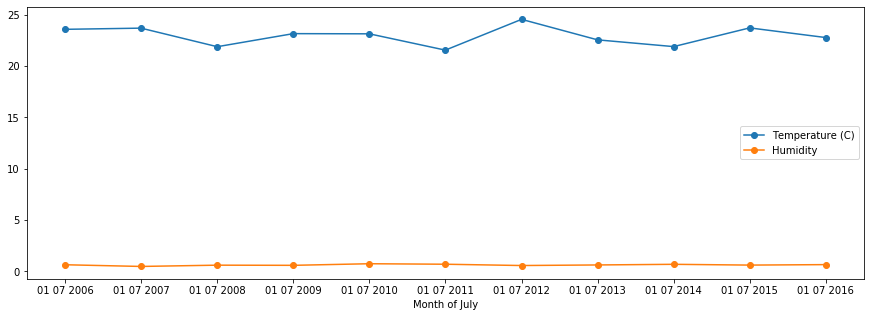

In [50]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==7]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-07-01':'2016-07-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-07-01':'2016-07-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['07-01-2006','07-01-2007','07-01-2008','07-01-2009','07-01-2010','07-01-2011','07-01-2012','07-01-2013','07-01-2014','07-01-2015','07-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of July')

### We can see that average temperature rises in between and is unstable throughout this span but no change in Average temperature seen.

Text(0.5, 0, 'Month of August')

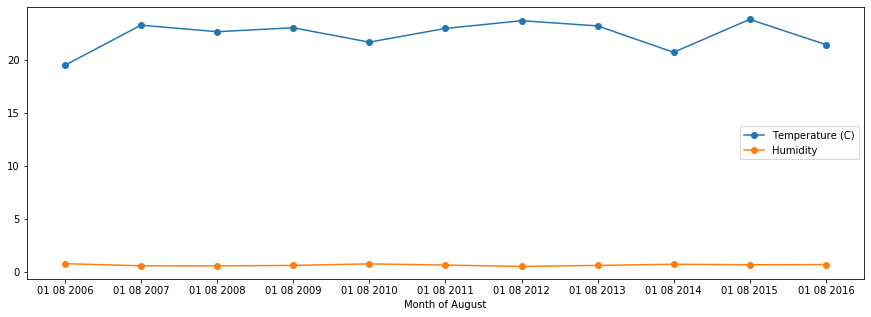

In [51]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==8]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-08-01':'2016-08-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-08-01':'2016-08-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['08-01-2006','08-01-2007','08-01-2008','08-01-2009','08-01-2010','08-01-2011','08-01-2012','08-01-2013','08-01-2014','08-01-2015','08-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of August')

### We can see a constant rise in the Average temperature graph.

Text(0.5, 0, 'Month of September')

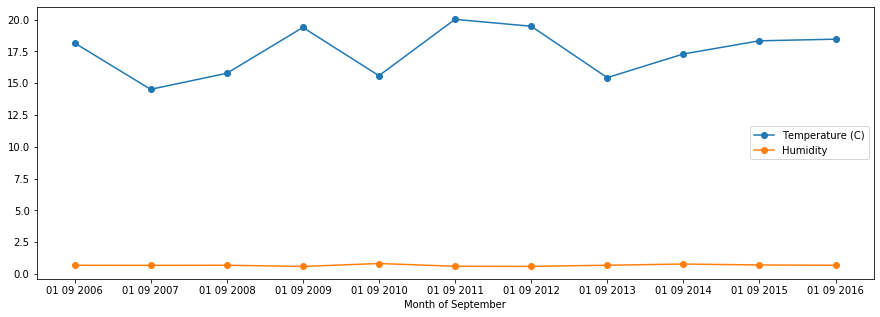

In [52]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==9]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-09-01':'2016-09-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-09-01':'2016-09-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['09-01-2006','09-01-2007','09-01-2008','09-01-2009','09-01-2010','09-01-2011','09-01-2012','09-01-2013','09-01-2014','09-01-2015','09-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of September')

### This graph is also unstable and shows the unstability of temperature.

Text(0.5, 0, 'Month of October')

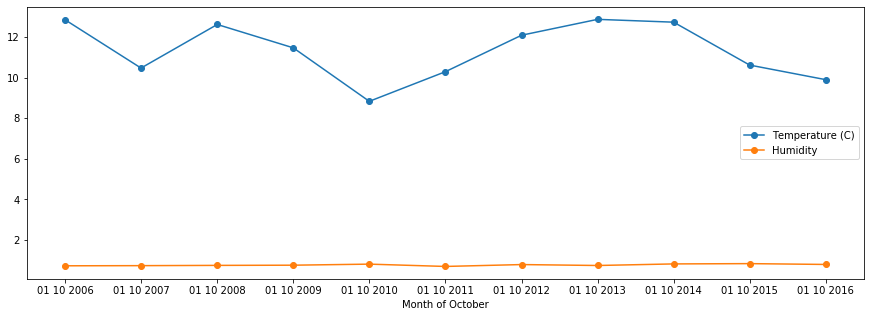

In [53]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==10]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-10-01':'2016-10-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-10-01':'2016-10-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['10-01-2006','10-01-2007','10-01-2008','10-01-2009','10-01-2010','10-01-2011','10-01-2012','10-01-2013','10-01-2014','10-01-2015','10-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of October')

### we can see two curving nature of the average temperature.

Text(0.5, 0, 'Month of November')

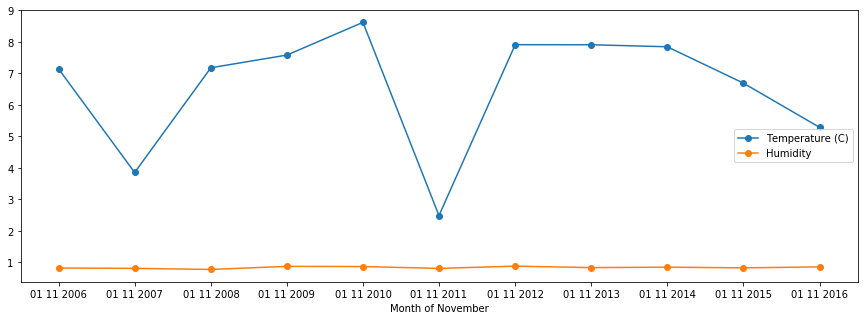

In [55]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==11]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-11-01':'2016-11-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-11-01':'2016-11-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['11-01-2006','11-01-2007','11-01-2008','11-01-2009','11-01-2010','11-01-2011','11-01-2012','11-01-2013','11-01-2014','11-01-2015','11-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of November')

### From the above two graphs we can see that the temperature sharply falls from October(i.e. 12 degrees ) to November(i.e. 3 degrees). And both the graphs are also too unstable showing the affect of Global Warming.

Text(0.5, 0, 'Month of December')

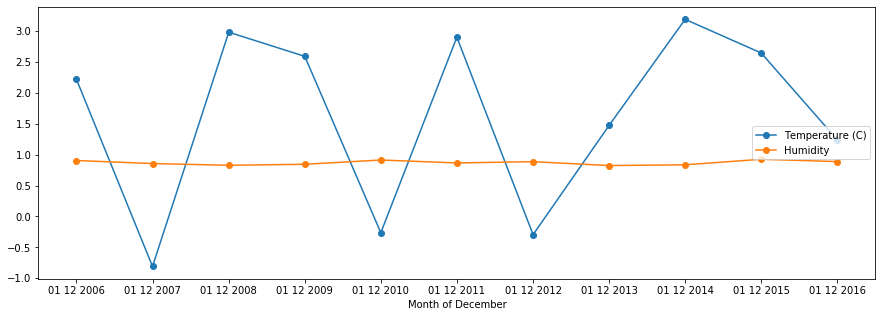

In [57]:
import matplotlib.dates as mdates
df1=month_mean[month_mean.index.month==12]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df1.loc['2006-12-01':'2016-12-01', 'Temperature (C)'], marker='o', linestyle='-',label='Temperature (C)')
ax.plot(df1.loc['2006-12-01':'2016-12-01', 'Humidity'], marker='o', linestyle='-',label='Humidity')
ax.set_xticks(['12-01-2006','12-01-2007','12-01-2008','12-01-2009','12-01-2010','12-01-2011','12-01-2012','12-01-2013','12-01-2014','12-01-2015','12-01-2016'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %m %Y'))
ax.legend(loc = 'center right')
ax.set_xlabel('Month of December')

Observation
------------

    I Observed, Thus from the above visualization it is clear that there is a markable change in the Average Apparent Temperature due to Global Warming. The humidity remains approximately constant throughout the time span